In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense , LSTM

plt.style.use('fivethirtyeight')

In [42]:
df = pd.read_csv('C:/Users/aidin/Downloads/خگستر.csv')
df=df.set_index('date')

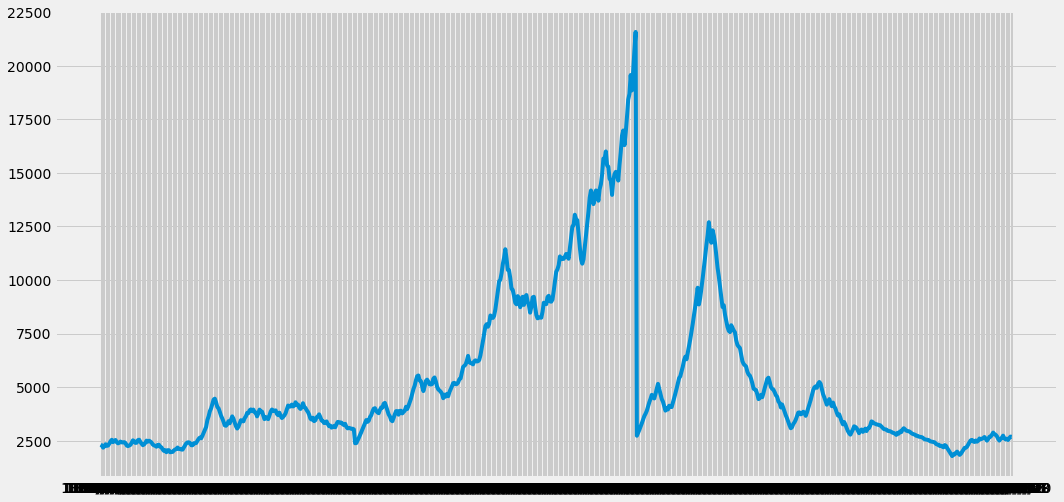

In [43]:
plt.figure(figsize=(16,8))
plt.plot(df['close'])
plt.show()

In [44]:
data=df.filter(['close'])
dataset=data.values


In [45]:
training_data_len=math.ceil(len(dataset)*0.8)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.02696697],
       [0.02524997],
       [0.01989698],
       [0.02282598],
       [0.02802747],
       [0.02413898],
       [0.02494698],
       [0.02954247],
       [0.03504696],
       [0.03843046],
       [0.03287547],
       [0.03630946],
       [0.03792546],
       [0.03262297],
       [0.03004747],
       [0.03146147],
       [0.03423897],
       [0.03221897],
       [0.03231997],
       [0.03282497],
       [0.03075447],
       [0.02489648],
       [0.02353298],
       [0.02484598],
       [0.02641147],
       [0.03146147],
       [0.03716796],
       [0.03519846],
       [0.03105747],
       [0.03151197],
       [0.03757196],
       [0.03858196],
       [0.03348147],
       [0.02923947],
       [0.02580547],
       [0.02747197],
       [0.03115847],
       [0.03646096],
       [0.03398647],
       [0.03630946],
       [0.03444097],
       [0.03191597],
       [0.02737097],
       [0.02524997],
       [0.02418948],
       [0.02211898],
       [0.02656297],
       [0.026

In [46]:
training_data=scaled_data[0:training_data_len , :]


xtrain=[]
ytrain=[]
n = 50


for i in range(n,len(training_data)):
    xtrain.append(training_data[i-n:i , 0])
    ytrain.append(training_data[i,0])


In [47]:
xtrain , ytrain = np.array(xtrain) , np.array(ytrain)
xtrain=np.reshape(xtrain , (xtrain.shape[0],xtrain.shape[1],1))
xtrain.shape


(538, 50, 1)

In [48]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(xtrain.shape[1],1)))
model.add(LSTM(100,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [49]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [50]:
model.fit(xtrain,ytrain,epochs=40,batch_size=2)

Epoch 1/40
269/269 [==============================] - 5s 20ms/step - loss: 0.0090
Epoch 2/40
269/269 [==============================] - 6s 21ms/step - loss: 0.0069
Epoch 3/40
269/269 [==============================] - 6s 21ms/step - loss: 0.0055
Epoch 4/40
269/269 [==============================] - 6s 21ms/step - loss: 0.0049
Epoch 5/40
269/269 [==============================] - 5s 20ms/step - loss: 0.0027
Epoch 6/40
269/269 [==============================] - 5s 20ms/step - loss: 0.0032
Epoch 7/40
269/269 [==============================] - 6s 21ms/step - loss: 0.0033
Epoch 8/40
269/269 [==============================] - 6s 22ms/step - loss: 0.0048
Epoch 9/40
269/269 [==============================] - 5s 20ms/step - loss: 0.0042
Epoch 10/40
269/269 [==============================] - 6s 21ms/step - loss: 0.0030
Epoch 11/40
269/269 [==============================] - 6s 22ms/step - loss: 0.0029
Epoch 12/40
269/269 [==============================] - 7s 25ms/step - loss: 0.0022
Epoch 13/40
2

In [22]:
test_data=scaled_data[training_data_len - n : , :]
xtest=[]
ytest=dataset[training_data_len : , :]
for i in range(n , len(test_data)):
    xtest.append(test_data[i-n : i , 0])

In [23]:
xtest=np.array(xtest)
xtest=np.reshape(xtest , (xtest.shape[0],xtest.shape[1],1))

In [24]:
prediction=model.predict(xtest)
prediction=scaler.inverse_transform(prediction)
#root mean squared error
rmse=np.sqrt(np.mean((prediction - ytest)**2))
rmse


795.7846153802608

In [25]:

train=data[:training_data_len]
valid=data[training_data_len:]
valid['prediction']=prediction

E:\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


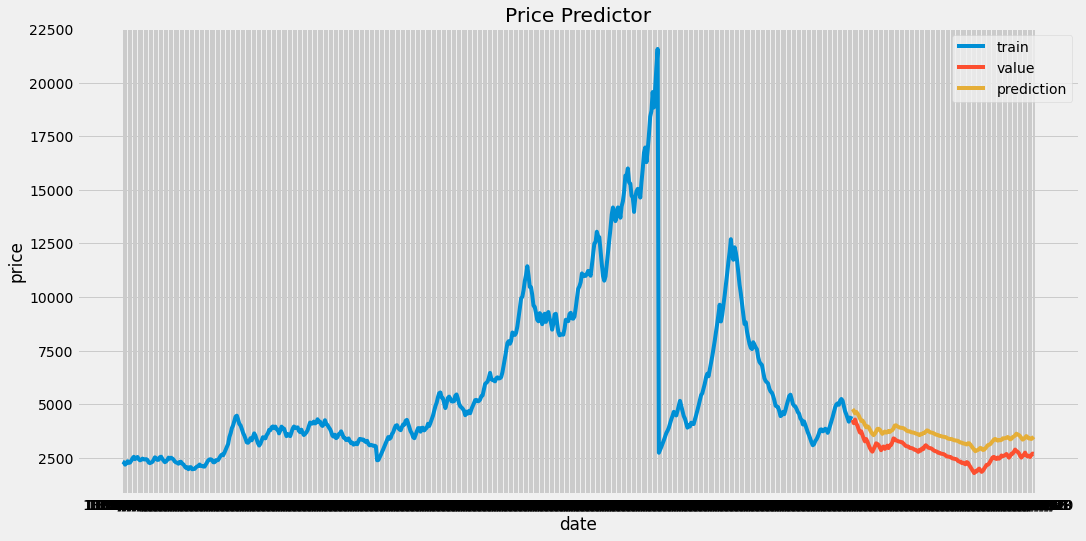

In [27]:
plt.figure(figsize=(16,8))
plt.title('Price Predictor')
plt.xlabel('date')
plt.ylabel('price')
plt.plot(train['close'])
plt.plot(valid[['close','prediction']])
plt.legend(['train','value','prediction'])
plt.show()

In [28]:
valid


,close,prediction
date,,
1399/10/06,4260.0,4766.229004
1399/10/07,4110.0,4692.045898
1399/10/08,4280.0,4567.617188
1399/10/09,4100.0,4639.590820
1399/10/10,3990.0,4559.218262
...,...,...
1400/05/16,2593.0,3399.058105
1400/05/17,2531.0,3402.726074
1400/05/18,2621.0,3371.818848


In [29]:
newdf=data[-50:].values
scalednewdf=scaler.transform(newdf)


In [30]:
xtest=[]
xtest.append(scalednewdf)
xtest=np.array(xtest)
xtest=np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))

In [31]:

pred=model.predict(xtest)
pred=scaler.inverse_transform(pred)
print('Next Day Prediction:  ' , pred)

Next Day Prediction:   [[3486.7217]]
